In [37]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from scipy.signal import find_peaks

In [38]:
ts = pd.read_csv('amz.csv')
ts = ts.set_index('Date')

In [39]:
ts.head()

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2014-12-31,15.5775,15.6490,15.5005,15.5175,15.5175,40960000
2015-01-02,15.6290,15.7375,15.3480,15.4260,15.4260,55664000
2015-01-05,15.3505,15.4190,15.0425,15.1095,15.1095,55484000
2015-01-06,15.1120,15.1500,14.6190,14.7645,14.7645,70380000
2015-01-07,14.8750,15.0640,14.7665,14.9210,14.9210,52806000


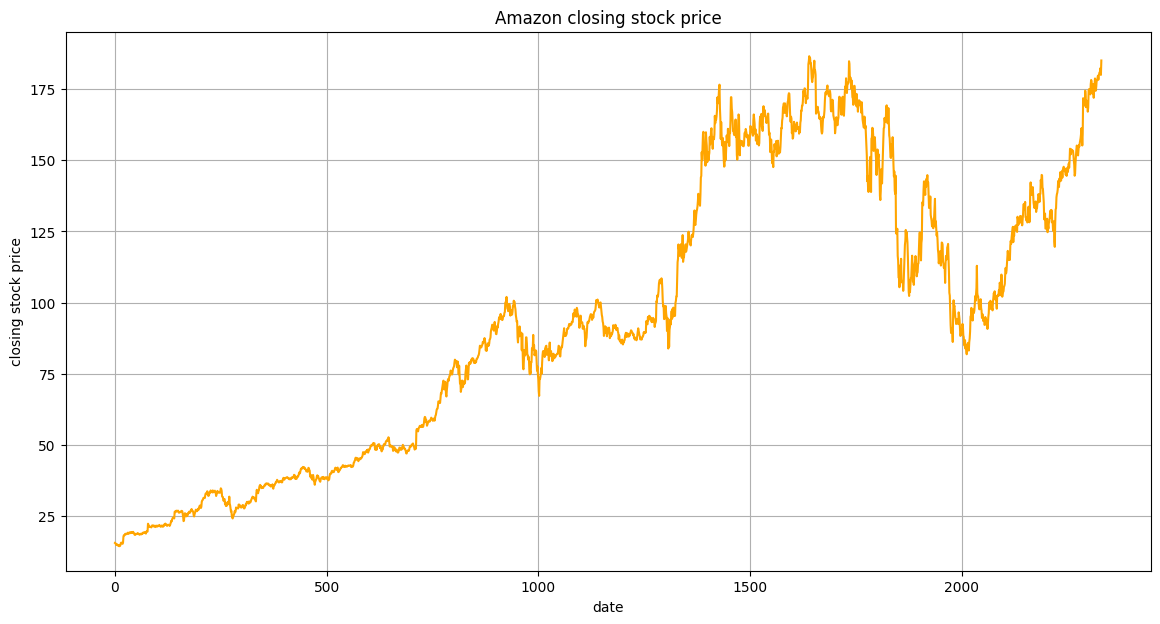

In [40]:
fig, ax = plt.subplots(figsize=(14, 7))

ax.plot(np.arange(ts.shape[0]), ts['Close'], color='orange')

ax.set_title('Amazon closing stock price')
ax.set_xlabel('date')
ax.set_ylabel('closing stock price')
ax.grid()

plt.show()

In [41]:
ts_freq = np.fft.fft(ts['Close']).real
peaks, _ = find_peaks(ts_freq[:300])

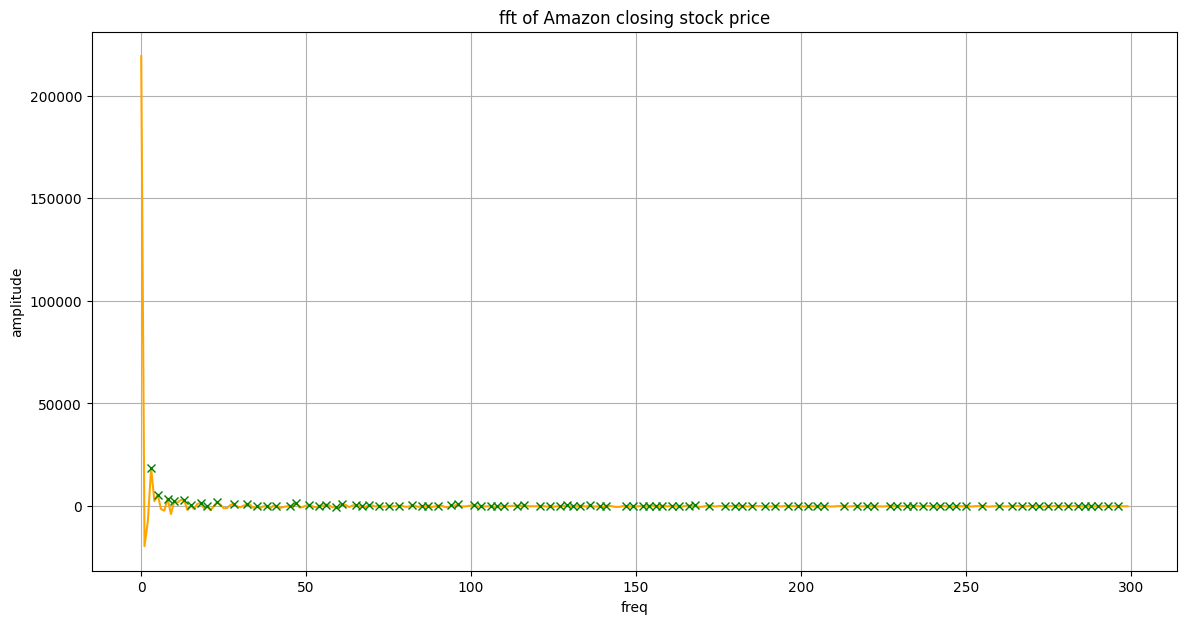

In [42]:
fig, ax = plt.subplots(figsize=(14, 7))

ax.plot(np.arange(len(ts_freq[:300])), ts_freq[:300], color='orange')
ax.plot(peaks, ts_freq[peaks], 'x', color='green')

ax.set_title('fft of Amazon closing stock price')
ax.set_xlabel('freq')
ax.set_ylabel('amplitude')
ax.grid()

plt.show()

In [43]:
ts_PSD = np.abs(np.fft.fft(ts['Close']).real)**2
peaks, _ = find_peaks(ts_PSD[:300])

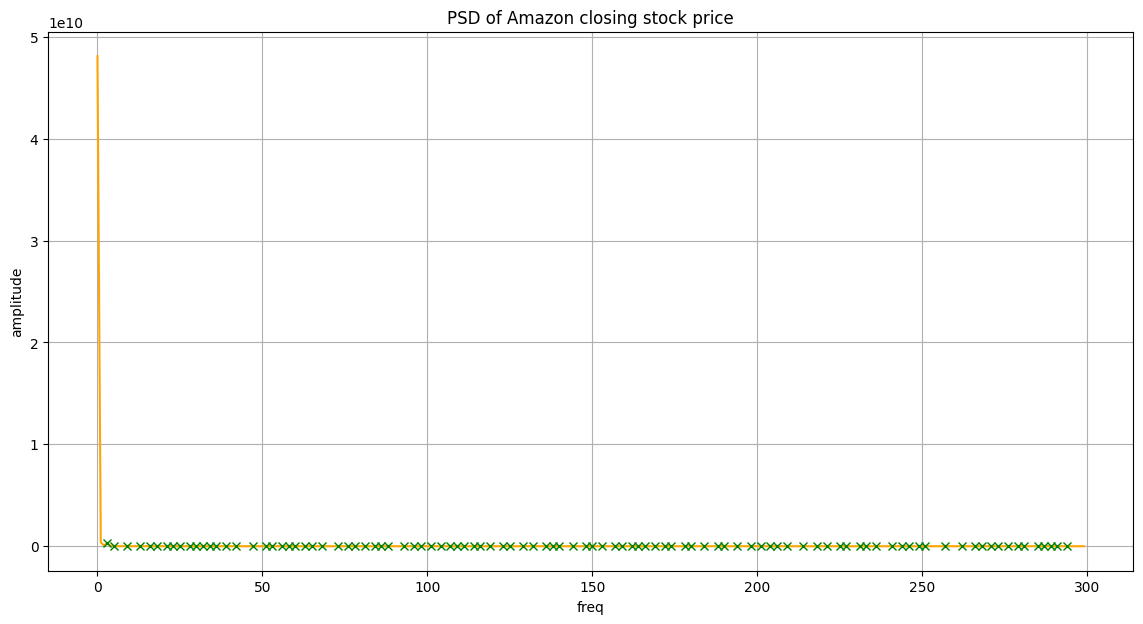

In [44]:
fig, ax = plt.subplots(figsize=(14, 7))

ax.plot(np.arange(len(ts_PSD[:300])), ts_PSD[:300], color='orange')
ax.plot(peaks, ts_PSD[peaks], 'x', color='green')

ax.set_title('PSD of Amazon closing stock price')
ax.set_xlabel('freq')
ax.set_ylabel('amplitude')
ax.grid()

plt.show()